## Ceneo Analyzer

### Loading libraries

In [76]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Listing codes ofr all products for which opinions have been extracted

In [77]:
if os.path.exists("opinions"):
    print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

119663219
123349750
166085419
92334630


### Specifying opinions about which product is to be analyzed

In [78]:
product_id = input("Please provide Ceneo.pl product code: ")

### Importing opinions from JSON file to  pandas.DataFrame object

In [79]:
opinions = pd.read_json(f"opinions/{product_id}.json")
MAX_SCORE = 5
opinions.score =  opinions.score.apply(lambda s: round(s*MAX_SCORE, 1))

### Basic Statistics

In [80]:
MAX_SCORE = 5
opinions_count = opinions.index.size
pros_count = opinions.pros.apply(lambda p: None if not p else p).count()
cons_count = opinions.cons.apply(lambda c: None if not c else c).count()
average_score = opinions.score.mean()

## Basic charts

### Score histogram

[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, ''),
 Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '14')]

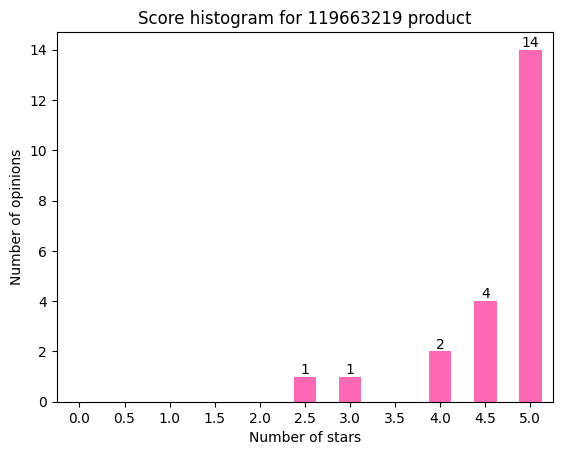

In [81]:
score_distribution = opinions.score.value_counts().reindex(np.arange(0,5.5,0.5), fill_value = 0)
fig, ax = plt.subplots()
score_distribution.plot.bar(color = "hotpink")
plt.xlabel("Number of stars")
plt.ylabel("Number of opinions")
plt.title(f"Score histogram for {product_id} product")
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], label_type="edge", fmt = lambda l: int(l) if l else "")

### Recommendations shares

Text(0.5, 1.0, 'Recommendation shares for 119663219 product')

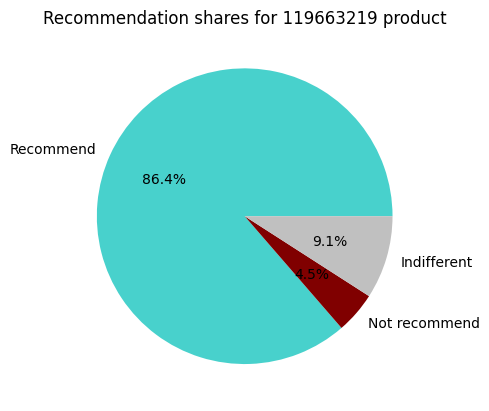

In [82]:
recommendation_distribution = opinions.recommendation.value_counts(dropna=False).reindex([True, False, np.nan], fill_value = 0)
recommendation_distribution.plot.pie(
    labels = ["Recommend", "Not recommend", "Indifferent"],
    label = "",
    colors = ["mediumturquoise", "maroon", "silver"],
    autopct = lambda l: "{:1.1f}%".format(l) if l else ""
)
plt.title(f"Recommendation shares for {product_id} product")